## Important Steps in a Typical Data Science Study
- Loading the related dataset
- Exploring the data with pandas and visualizations
- Transforming data
- Splitting the data into training, validation (optional) and testing
- Creating the model
- Training the model
- Testing the model
- Tuning the model and evaluating its accuracy
- Making predictions on live data that the model hasn’t seen before

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Case Study: Classification with k-Nearest Neighbors
#### Problem: Pumpkin Seed Classification
- The goal is to build a model to predict which class does any arbitrary seed belongs to and validate the model. These classes reflect the type of pumpkin seeds.
- Total number of classes - There are two important types of seeds, i.e., “Ürgüp Sivrisi” and “Çerçevelik”. So, we have two number of classes.
#### Relevant Dataset: A scientific study was done using the dataset available at https://www.muratkoklu.com/datasets/ by authors in KOKLU, M., SARIGIL, S., & OZBEK, O. (2021). The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.). Genetic Resources and Crop Evolution, 68(7), 2713-2726. Doi: https://doi.org/10.1007/s10722-021-01226-0
#### Choice of Model: k-Nearest Neighbors

![image.png](attachment:95f9618e-350f-4368-8aaf-d47caabb807b.png)

![image.png](attachment:ad7029d2-a8ce-4159-8c8f-62fdf47c76ea.png)

##### Import all the necessary libraries and load the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC

##### Questions to think about ....
- What does a typical datapoint look like?
- What is the size of my data?
- Is my data balanced?
- Are there any missing values?

In [7]:
%ls
%cd drive/MyDrive/Data Science/
%ls

drive/  sample_data/
/content/drive/MyDrive/Data Science
Activity1.ipynb   BL-Flickr-Images-Book.csv   olympics.csv                university_towns.txt
activity-2.ipynb  dermatology_database_1.csv  Pumpkin_Seeds_Dataset.xlsx


In [14]:
seed_data = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")
seed_data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [12]:
seed_data.head()

(2500, 13)

In [13]:
seed_data.Class.value_counts()

,count
Class,
Çerçevelik,1300
Ürgüp Sivrisi,1200


#### Data Cleaning
##### Questions to think about ....
- Do I need to change any attribute names to make them relatable?
- Do I need to encode my nonnumerical features?
- Do I need to handle any missing values?
- Do I need to handle imbalanced data?
- Are there any duplicates in my data?

In [15]:
# No imbalanced values or missing data
seed_data.isnull().sum()

,0
Area,0
Perimeter,0
Major_Axis_Length,0
Minor_Axis_Length,0
Convex_Area,0
Equiv_Diameter,0
Eccentricity,0
Solidity,0
Extent,0
Roundness,0


In [16]:
# check duplicated values
seed_data.duplicated().sum()

0

#### Exploratory Analysis
##### Questions to think about ....
- What are the predictors and target variables?
- How are the attributes distributed?
- How are these attributes related to each other?
- Do I need to normalize my data?

In [18]:
# Exploratory Analysis
seed_data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [21]:
# Encode nonnumerical values
label_enc = preprocessing.LabelEncoder()
#
seed_data['Class'] = label_enc.fit_transform(seed_data['Class'])
# now 0 and 1 for class instead of the class names
seed_data.Class.value_counts()

,count
Class,
0,1300
1,1200


<ipython-input-24-cf2989210858>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  seed_data.hist(ax=ax)


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'Major_Axis_Length'}>,
        <Axes: title={'center': 'Minor_Axis_Length'}>],
       [<Axes: title={'center': 'Convex_Area'}>,
        <Axes: title={'center': 'Equiv_Diameter'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'Solidity'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Roundness'}>,
        <Axes: title={'center': 'Aspect_Ration'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

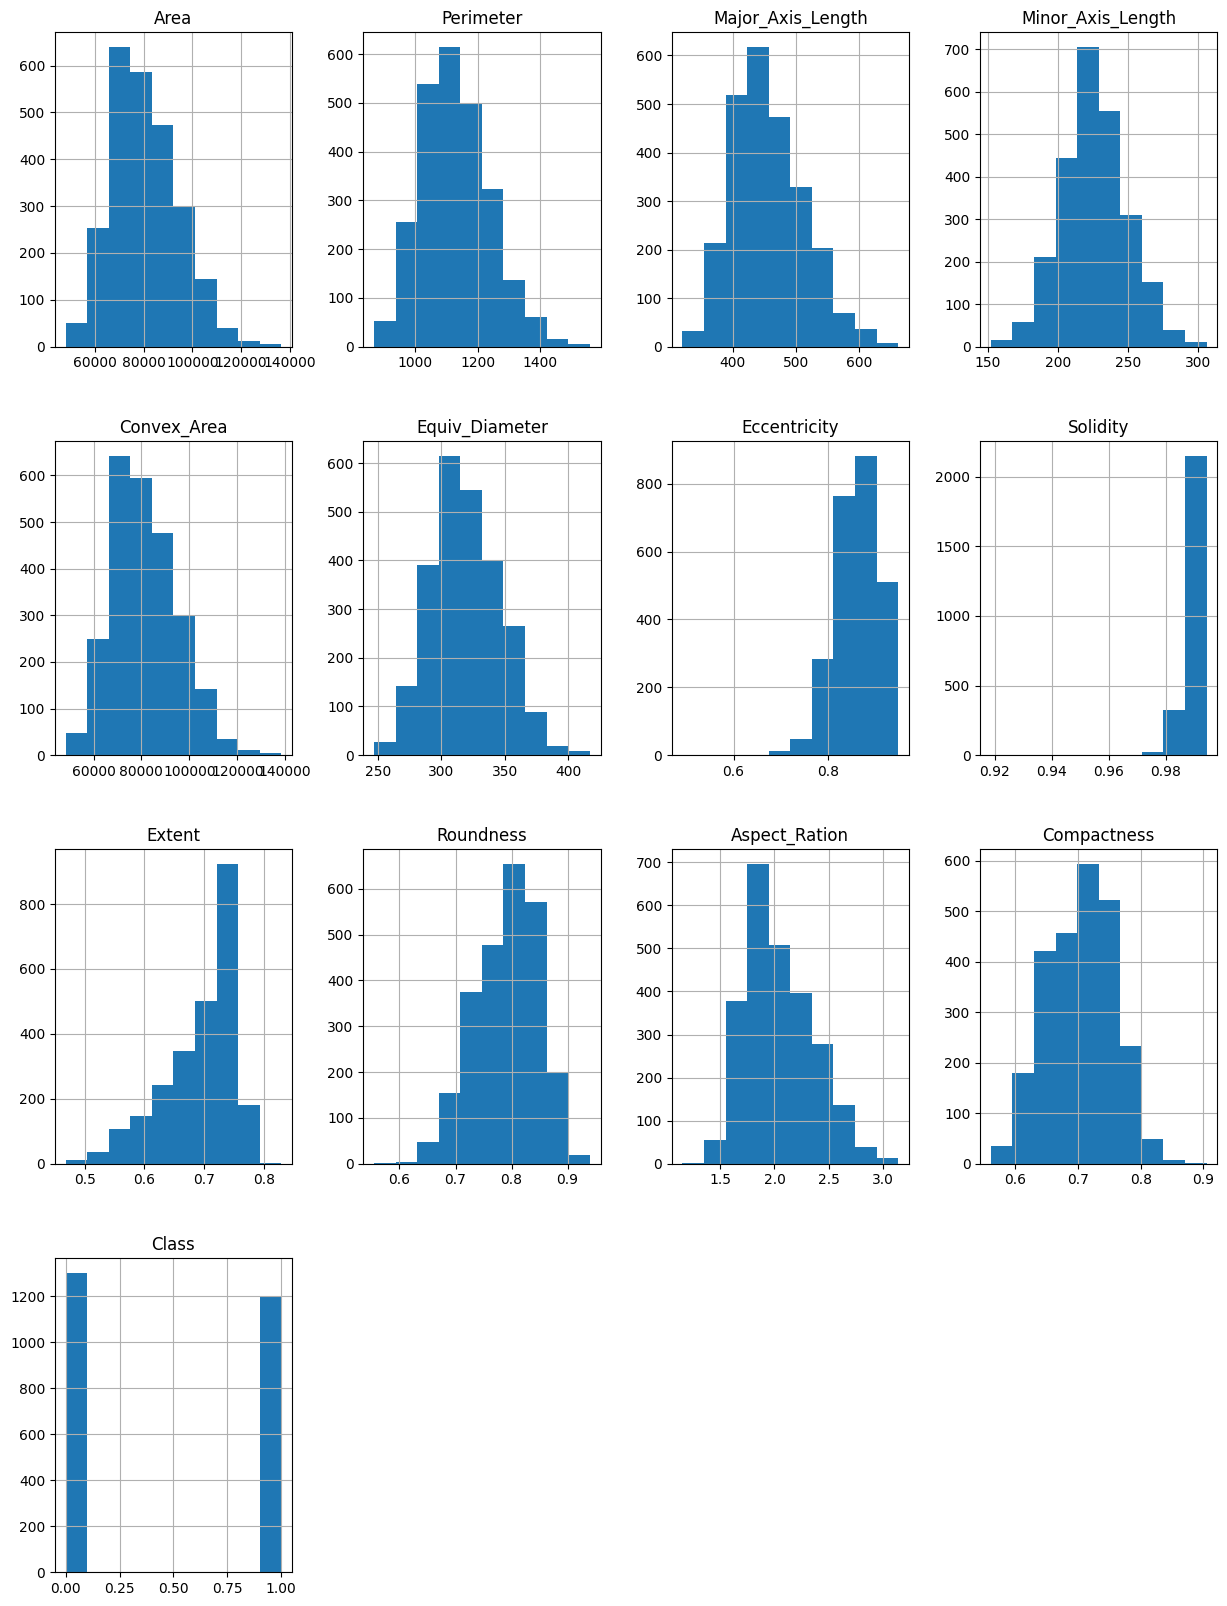

In [24]:
# how are the attributes distributed?
fig = plt.figure(figsize=(15,20))
ax = fig.gca()
seed_data.hist(ax=ax)

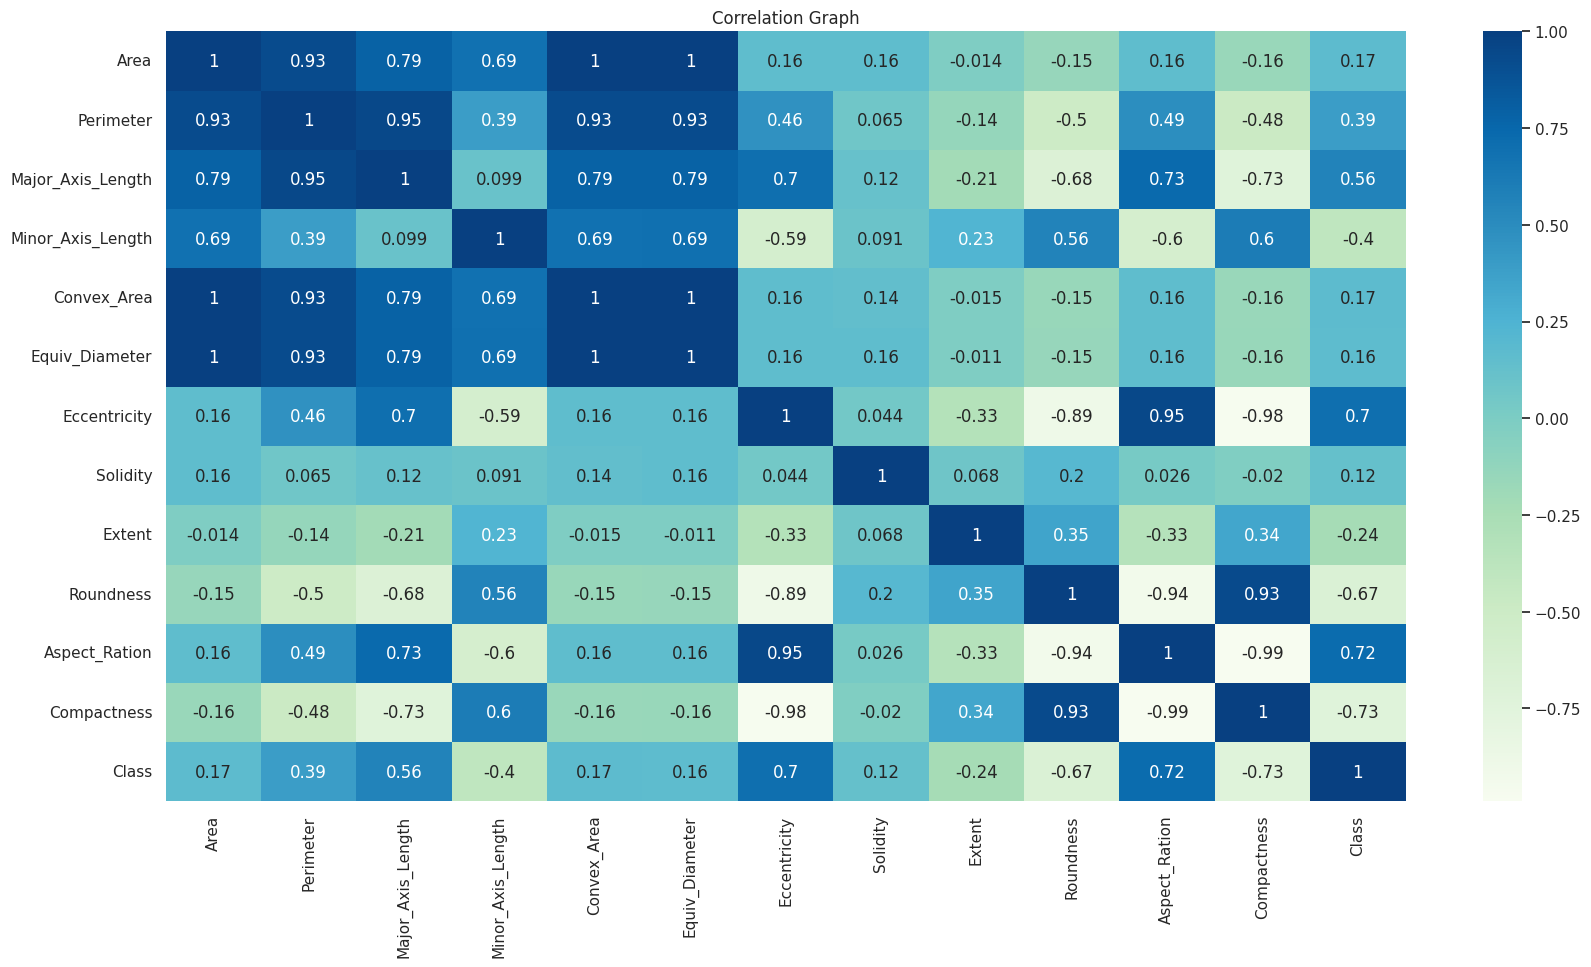

In [25]:
sns.set()
plt.figure(figsize = (20,10))
sns.heatmap(seed_data.corr(), cmap='GnBu', annot=True)
plt.title('Correlation Graph')
plt.show()

<Axes: >

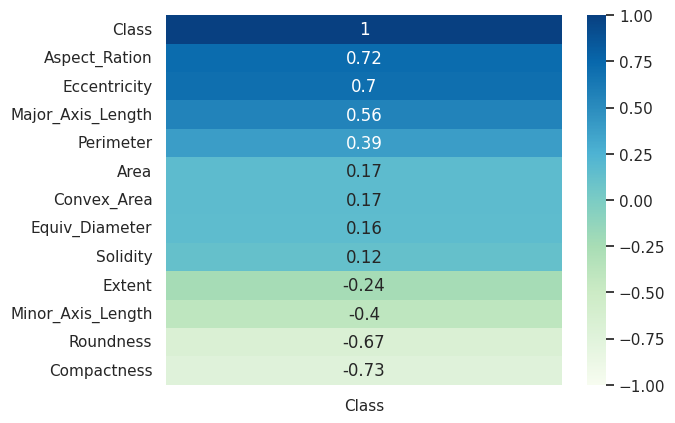

In [33]:
sns.heatmap(seed_data.corr()[["Class"]].sort_values(by="Class", ascending=False), vmin=-1, vmax=1, annot=True, cmap="GnBu")

#### Preparing Data for model training and testing
- What is a reasonable partition of my data?
- Should I consider all the predictors for training my model?
- How should I prepare my data for the easy processing?

In [34]:
# how should I prepare data for easy processing?
# x is for prediction variables
X = seed_data.drop(["Class"], axis=1)
# y is for target variables only
y = seed_data.Class

# 20% of data should be testing rest should be training
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)



In [35]:
y_train.value_counts()

,count
Class,
0,1049
1,951


In [36]:
scaler = preprocessing.StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_train_sc[:5,]

array([[-0.59151048, -0.19099892,  0.26252393, -1.2512918 , -0.6042269 ,
        -0.57051539,  1.07122523,  0.60183314,  0.51299094, -0.89258216,
         1.11817017, -1.11336298],
       [-0.17248407, -0.0063621 ,  0.24017202, -0.57672031, -0.18532764,
        -0.13335045,  0.69833624,  0.63027718, -0.22885551, -0.36126006,
         0.5417128 , -0.61142642],
       [-0.36081386,  0.08584639,  0.38382984, -0.92508259, -0.35470101,
        -0.32778869,  0.96851329, -0.33682006, -1.83124384, -1.04312343,
         0.94337138, -1.03064685],
       [-0.03779438,  0.99016195,  1.58078133, -1.62116053, -0.03752816,
         0.00376368,  1.73885283,  0.00450838, -2.48901436, -2.39445263,
         2.70808188, -2.23191077],
       [-1.15053163, -1.21967275, -1.19410279, -0.50874802, -1.146719  ,
        -1.181471  , -0.56770005, -0.39370813,  0.01842664,  0.53313214,
        -0.70017894,  0.6499947 ]])

<ipython-input-38-e0c501aec498>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train_sc_df.hist(ax=ax)


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: title={'center': '11'}>]], dtype=object)

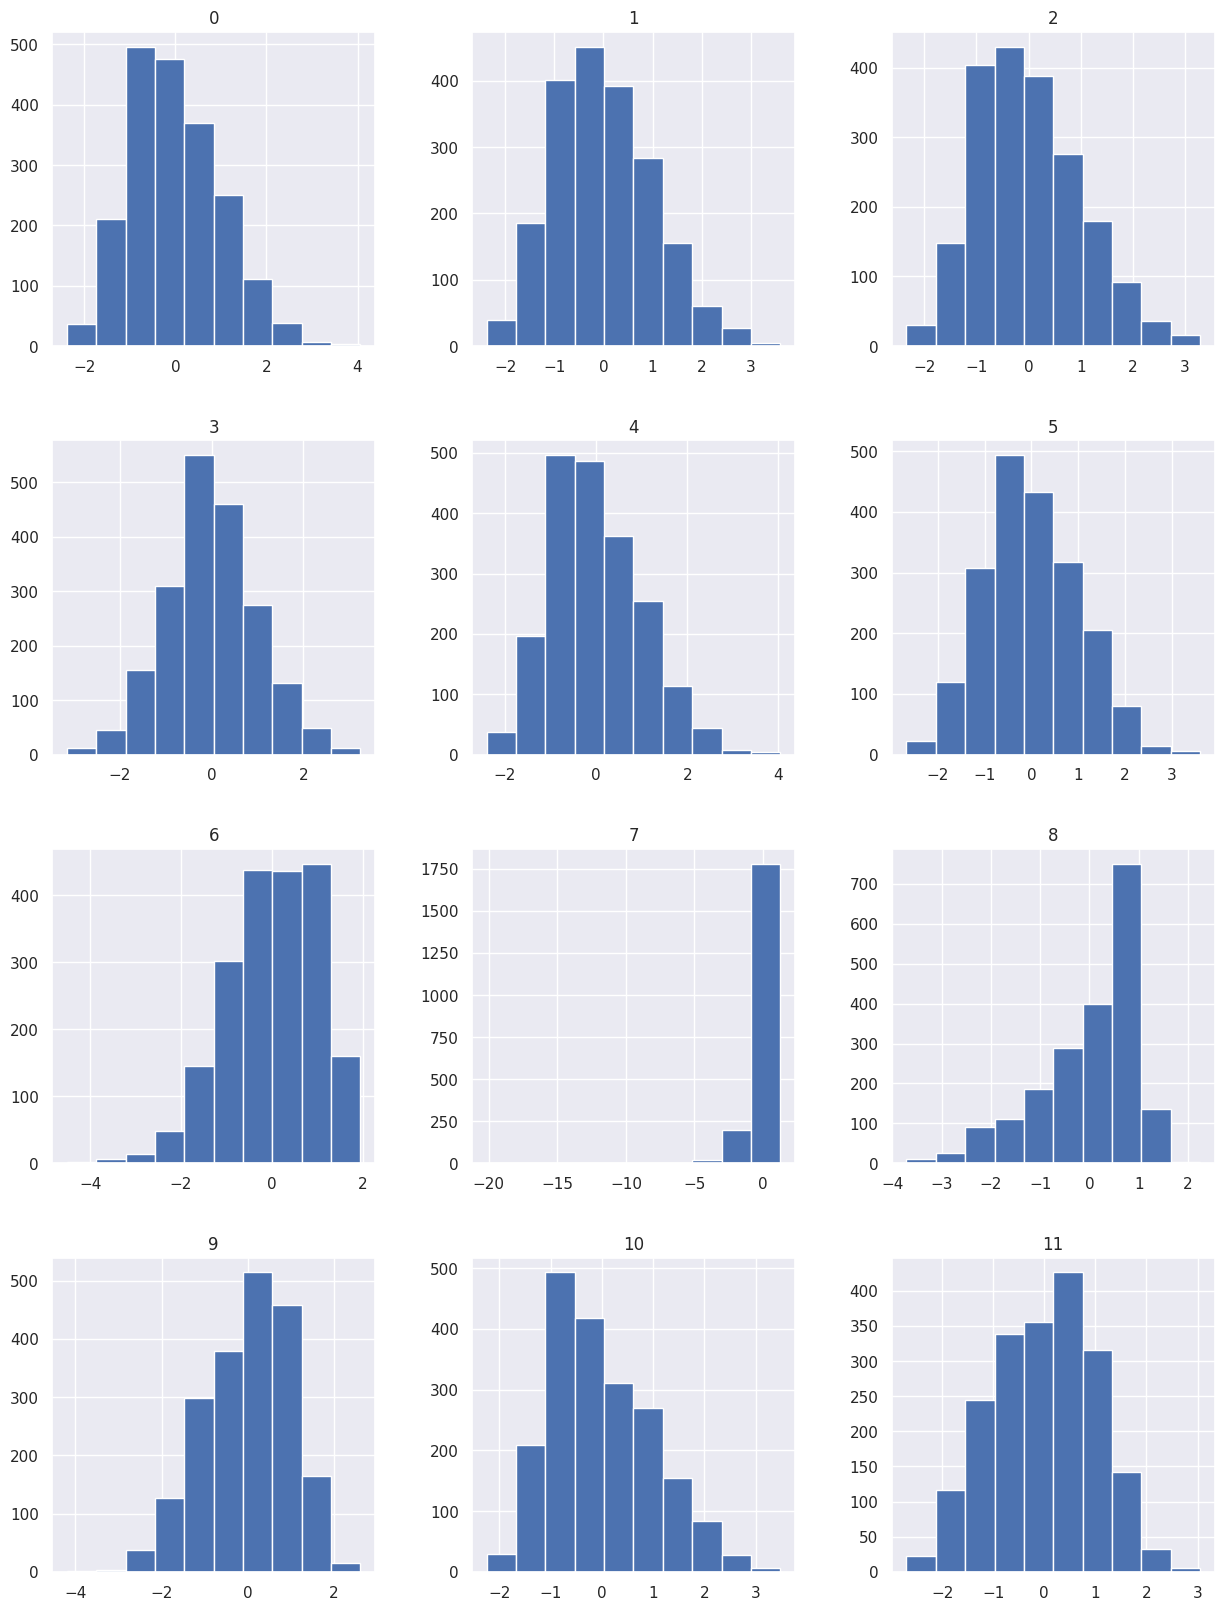

In [38]:
X_train_sc_df = pd.DataFrame(X_train_sc)
fig = plt.figure(figsize=(15,20))
ax = fig.gca()
X_train_sc_df.hist(ax=ax)

In [41]:
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y=y_train)


KNeighborsClassifier()

In [42]:
train_predict = knn.predict(X=X_train_sc)
test_predict = knn.predict(X=X_test_sc)
test_predict[:5]

array([1, 0, 0, 1, 1])

#### Model Creation and Training

#### Model Evaluation

#### Questions to consider ....
- Is my current choice of metric suitable for my problem?
- What other choices do I have?
- Is my model good enough?
- How can I improve its performance?
- What are the different ways to evaluate it?

#### Hyperparameter Tuning

#### What is the take-home message?